<a href="https://colab.research.google.com/github/hari-ar/LendingClub/blob/main/CaseStudy_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#This is the notebook for the case study for Module 1 EDA.

Imports for the analysis.

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy

import warnings
warnings.filterwarnings('ignore')
import plotly.express as px #plotting

Load the file.

In [ ]:
imported_data = pd.read_csv("/content/loan.csv")

In [ ]:
imported_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [ ]:
imported_data.shape


(39717, 111)

In [ ]:
# We can see there are many columns which is having all the value as null/blanks and not doesn participate in analysis.
#Hence removing them
print("Total columns with values NA: ", len(imported_data.columns[imported_data.isna().all()].tolist()))
na_columns=list(imported_data.columns[imported_data.isna().all()])

Total columns with values NA:  54


In [ ]:
imported_data.columns[imported_data.isna().any()].tolist()

['emp_title',
 'emp_length',
 'desc',
 'title',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'revol_util',
 'last_pymnt_d',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'chargeoff_within_12_mths',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il

In [ ]:

print("Count where all values are NA is :" , imported_data.isnull().all(axis=0).sum())


Count where all values are NA is : 54


54 of the columns have all empty records. Hence they are not useful for our analysis. So removing them from the dataset.

Drop the cells with all na values and check for columns with high missing data.

In [ ]:
dropped_na=imported_data.dropna(axis=1, how='all')
round(100*dropped_na.isnull().mean(),2)
imported_data=imported_data.dropna(axis=1, how='all')


In [ ]:
# Deleting the rows which is having all columns values as na.
imported_data = imported_data.dropna(axis=0, how="all")

In [ ]:
# Lets delete all the columns which value is uniqe in nature.

unique_columns = [col for col in imported_data.columns if imported_data[col].nunique() == len(imported_data)]
unique_columns

['id', 'member_id', 'url']

In [ ]:
# We will delete'member_id', and 'url' as it doesn't count in EDA. Will keep the id columns which will be bused for creating piviot table
imported_data.drop(['url','member_id'],axis=1, inplace=True)

In [ ]:
# Lets delete the column which is having text/description values as they don't donctribute to EDA.
imported_data.drop(columns=['desc','title'],inplace=True)
imported_data.shape

(39717, 53)

In [ ]:
#Dropping the rows for loan_status=='Current' as the loan currently in progress and cannot contribute to conclusive evidence if the customer will default of pay in future.
imported_data= imported_data[imported_data['loan_status']!='Current']
print("Total number of rows now:",len(imported_data)) ## Total no of rows now.

Total number of rows now: 38577


**Analyze columns with hign number of NA and remove them**
* We notice mths_since_last_record, next_pymnt_d has high nulls and can be safely removed.

* mths_since_last_delinq is also on the higher side, but since that is a field with potential impact, keeping it for now.

In [ ]:
filtered = dropped_na.drop(['mths_since_last_record', 'next_pymnt_d'], axis=1)
filtered.head()



,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


*   There are several columns which are single valued




In [ ]:
filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 55 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

* We notice some numeric columns are objects like term, int_rate. So, check what is causing that.

In [ ]:
filtered.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

* Since the data contains only 2 values 36 months and 60 months we can leave it as is, instead of converting them to numeric values.

In [ ]:
filtered.int_rate.unique()

array(['10.65%', '15.27%', '15.96%', '13.49%', '12.69%', '7.90%',
       '18.64%', '21.28%', '14.65%', '9.91%', '16.29%', '6.03%', '11.71%',
       '12.42%', '14.27%', '16.77%', '7.51%', '8.90%', '18.25%', '6.62%',
       '19.91%', '17.27%', '17.58%', '21.67%', '19.42%', '22.06%',
       '20.89%', '20.30%', '23.91%', '19.03%', '23.52%', '23.13%',
       '22.74%', '22.35%', '24.11%', '6.00%', '22.11%', '7.49%', '11.99%',
       '5.99%', '10.99%', '9.99%', '18.79%', '11.49%', '8.49%', '15.99%',
       '16.49%', '6.99%', '12.99%', '15.23%', '14.79%', '5.42%', '10.59%',
       '17.49%', '15.62%', '21.36%', '19.29%', '13.99%', '18.39%',
       '16.89%', '17.99%', '20.62%', '20.99%', '22.85%', '19.69%',
       '20.25%', '23.22%', '21.74%', '22.48%', '23.59%', '12.62%',
       '18.07%', '11.63%', '7.91%', '7.42%', '11.14%', '20.20%', '12.12%',
       '19.39%', '16.11%', '17.54%', '22.64%', '13.84%', '16.59%',
       '17.19%', '12.87%', '20.69%', '9.67%', '21.82%', '19.79%',
       '18.49%', '

Since the rate contains % we can convert this to numeric if we strip the percentage.

* This shows the rates vary from about 6 all the way upto 24 in some instances.

Let us check the variance of the columns, remove outliers or columns with same values.

In [ ]:
filtered.var().sort_values()

tax_liens                     0.000000e+00
delinq_amnt                   0.000000e+00
chargeoff_within_12_mths      0.000000e+00
acc_now_delinq                0.000000e+00
policy_code                   0.000000e+00
collections_12_mths_ex_med    0.000000e+00
pub_rec_bankruptcies          4.174831e-02
pub_rec                       5.626382e-02
delinq_2yrs                   2.418786e-01
inq_last_6mths                1.145369e+00
open_acc                      1.936249e+01
dti                           4.460361e+01
total_rec_late_fee            5.314380e+01
total_acc                     1.299990e+02
mths_since_last_delinq        4.848830e+02
collection_recovery_fee       2.210324e+04
installment                   4.362871e+04
out_prncp_inv                 1.397447e+05
out_prncp                     1.407547e+05
recoveries                    4.743694e+05
total_rec_int                 6.802248e+06
last_pymnt_amnt               1.977702e+07
total_rec_prncp               4.992160e+07
funded_amnt

There are some columns with 0 variance they can be safely removed.

In [ ]:
filtered = filtered.drop(['delinq_amnt', 'tax_liens', 'chargeoff_within_12_mths', 'acc_now_delinq', 'policy_code', 'collections_12_mths_ex_med'], axis=1)


In [ ]:
filtered['int_rate']=filtered.int_rate.apply(lambda x: float(str(x).replace("%", "")))
filtered.int_rate.unique()

array([10.65, 15.27, 15.96, 13.49, 12.69,  7.9 , 18.64, 21.28, 14.65,
        9.91, 16.29,  6.03, 11.71, 12.42, 14.27, 16.77,  7.51,  8.9 ,
       18.25,  6.62, 19.91, 17.27, 17.58, 21.67, 19.42, 22.06, 20.89,
       20.3 , 23.91, 19.03, 23.52, 23.13, 22.74, 22.35, 24.11,  6.  ,
       22.11,  7.49, 11.99,  5.99, 10.99,  9.99, 18.79, 11.49,  8.49,
       15.99, 16.49,  6.99, 12.99, 15.23, 14.79,  5.42, 10.59, 17.49,
       15.62, 21.36, 19.29, 13.99, 18.39, 16.89, 17.99, 20.62, 20.99,
       22.85, 19.69, 20.25, 23.22, 21.74, 22.48, 23.59, 12.62, 18.07,
       11.63,  7.91,  7.42, 11.14, 20.2 , 12.12, 19.39, 16.11, 17.54,
       22.64, 13.84, 16.59, 17.19, 12.87, 20.69,  9.67, 21.82, 19.79,
       18.49, 22.94, 24.59, 24.4 , 21.48, 14.82, 14.17,  7.29, 17.88,
       20.11, 16.02, 17.51, 13.43, 14.91, 13.06, 15.28, 15.65, 17.14,
       11.11, 10.37, 16.4 ,  7.66, 10.  , 18.62, 10.74,  5.79,  6.92,
        9.63, 14.54, 12.68, 19.36, 13.8 , 18.99, 21.59, 20.85, 21.22,
       19.74, 20.48,

In [ ]:
#converting issue_d`to date type
filtered['issue_d'] = pd.to_datetime(filtered.issue_d, format='%b-%y')
filtered['issue_d']

0       2011-12-01
1       2011-12-01
2       2011-12-01
3       2011-12-01
4       2011-12-01
           ...    
39712   2007-07-01
39713   2007-07-01
39714   2007-07-01
39715   2007-07-01
39716   2007-06-01
Name: issue_d, Length: 39717, dtype: datetime64[ns]

Next up, while analysing the loan_status we see there are some loans with status as current. We might not need those rows as we do not have the signal of any default.

In [ ]:
filtered = filtered[filtered.loan_status.str.lower() != 'current']
filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 49 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       38577 non-null  int64         
 1   member_id                38577 non-null  int64         
 2   loan_amnt                38577 non-null  int64         
 3   funded_amnt              38577 non-null  int64         
 4   funded_amnt_inv          38577 non-null  float64       
 5   term                     38577 non-null  object        
 6   int_rate                 38577 non-null  float64       
 7   installment              38577 non-null  float64       
 8   grade                    38577 non-null  object        
 9   sub_grade                38577 non-null  object        
 10  emp_title                36191 non-null  object        
 11  emp_length               37544 non-null  object        
 12  home_ownership           38577 n

In [ ]:
#Behavioural data is captured post loan approval and will not be available during the loan approval process. Hence removing these fields.
behavioural_cols=['delinq_2yrs', 'earliest_cr_line', 'last_pymnt_amnt','inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
                           'total_pymnt','total_pymnt_inv', 'total_rec_prncp',
                          'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
                        'last_pymnt_d','last_credit_pull_d']

filtered=filtered.drop(behavioural_cols,axis=1)

In [ ]:
# Example most of the columns values is 1.Deletting them as well.
for column in filtered.columns:
    if filtered[column].nunique(dropna=True) == 1:
        print(column)
        filtered = filtered.drop(column, axis=1)
print("-------------")
filtered

pymnt_plan
initial_list_status
out_prncp
out_prncp_inv
application_type
-------------


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,loan_status,url,desc,purpose,title,zip_code,addr_state,dti,mths_since_last_delinq,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,NaN,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,NaN,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,NaN,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,35.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,...,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07,78.42,A,A4,...,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Our current gutter system on our home is old a...,home_improvement,Home Improvement,802xx,CO,11.33,0.0,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28,275.38,C,C1,...,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,The rate of interest and fees incurred by carr...,credit_card,Retiring credit card debt,274xx,NC,6.40,5.0,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07,156.84,A,A4,...,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,MBA Loan Consolidation,017xx,MA,2.30,0.0,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43,155.38,A,A2,...,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN,other,JAL Loan,208xx,MD,3.72,0.0,NaN


#Derived Columns

In [ ]:
# Creating a dervied columns for issue month and issue year from issues date
filtered['issue_year']=pd.DatetimeIndex(filtered['issue_d']).year
filtered['issue_month']=pd.DatetimeIndex(filtered['issue_d']).month

In [ ]:
filtered.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

**Analysis**

* Since the assignment is about, understanding how likely it is for a person to default, we can skip univariate analysis and focus on bi-variate analysis.

* For further analysis, lets split the data into two sets. ChargedOff and Fullypaid.

In [ ]:
chargedOff=filtered[filtered.loan_status == 'Charged Off']
fullyPaid=filtered[filtered.loan_status == 'Fully Paid']

Let's analyze the interest rates of Defaulters vs Non Defaulters

## Visualizing Categorical Data
Univariate Analysis

Fully Paid     85.413588
Charged Off    14.586412
Name: loan_status, dtype: float64


Text(0.75, 0.1, 'Charged Off')

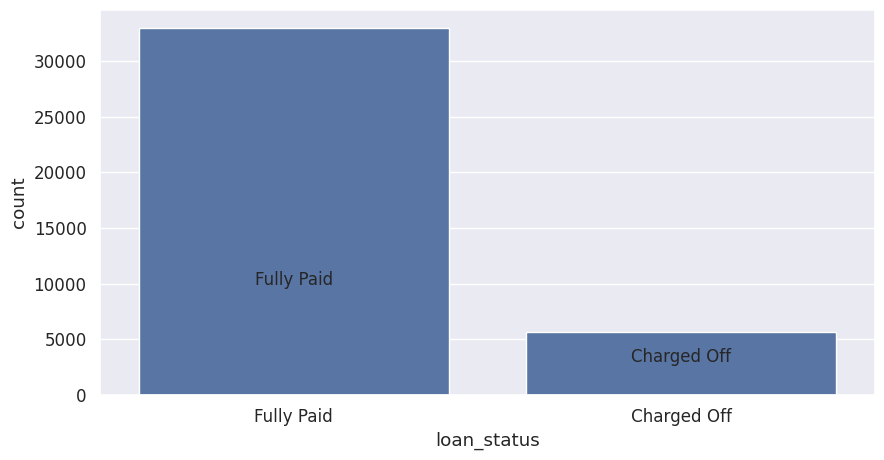

In [ ]:
#sns.countplot(x = 'loan_status', data = filtered)
# Loan status
print(filtered.loan_status.value_counts()*100/filtered.loan_status.count())
# 0=Fully Paid, 1=Charged Off
plt.figure(figsize=(10,5))
ax=sns.countplot(x=filtered.loan_status)
ax.annotate('Fully Paid',xy=(0.25,0.3),xycoords='axes fraction',horizontalalignment='center',verticalalignment='center',fontsize=12)
ax.annotate('Charged Off',xy=(0.75,0.1),xycoords='axes fraction',horizontalalignment='center',verticalalignment='center',fontsize=12)


In [ ]:
# Loan Amount
print(filtered.loan_amnt.describe())
#Plotting histogram of loan amount
px.box(filtered,x='loan_amnt',width=750,height=350,title='Distribution of Loan Amount',labels={'loan_amnt':'Loan Amount'}).show()

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


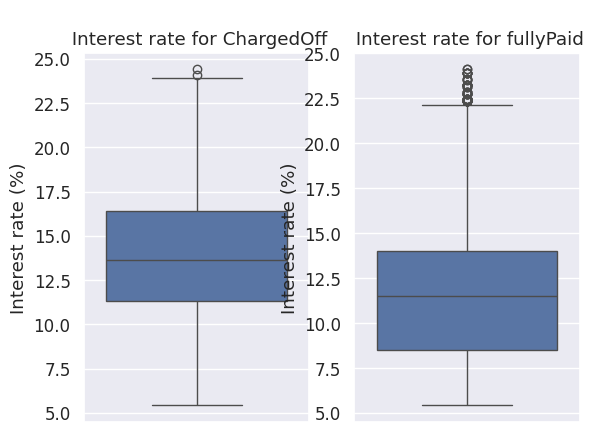

In [ ]:
plt.subplot(1,2,1)
sns.boxplot(y=chargedOff.int_rate)
plt.title("\n Interest rate for ChargedOff")
plt.ylabel('Interest rate (%)')


plt.subplot(1,2,2)
sns.boxplot(y=fullyPaid.int_rate)
plt.title("\n Interest rate for fullyPaid")
plt.ylabel('Interest rate (%)')

plt.show()

* It is observed that, charged off applicants have high median interest rate. One possible explanation is based on their credit score or risk. Which inturn resullts in high defualt.

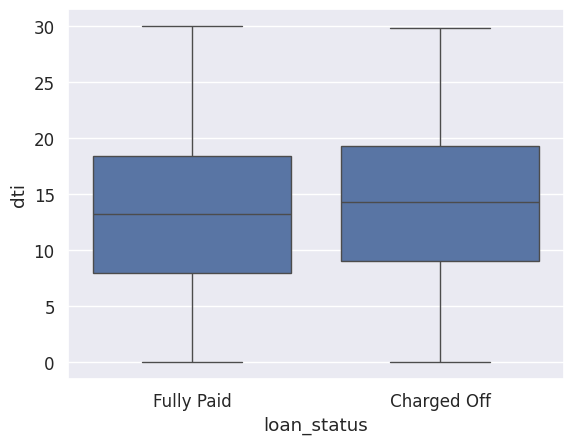

In [ ]:
    sns.boxplot(x=filtered['loan_status'], y=filtered['dti'])
    plt.show()

* We notice dti median is also slightly higher for Charged Off loans, compared to FUlly Paid.

 36 months    75.42318
 60 months    24.57682
Name: term, dtype: float64


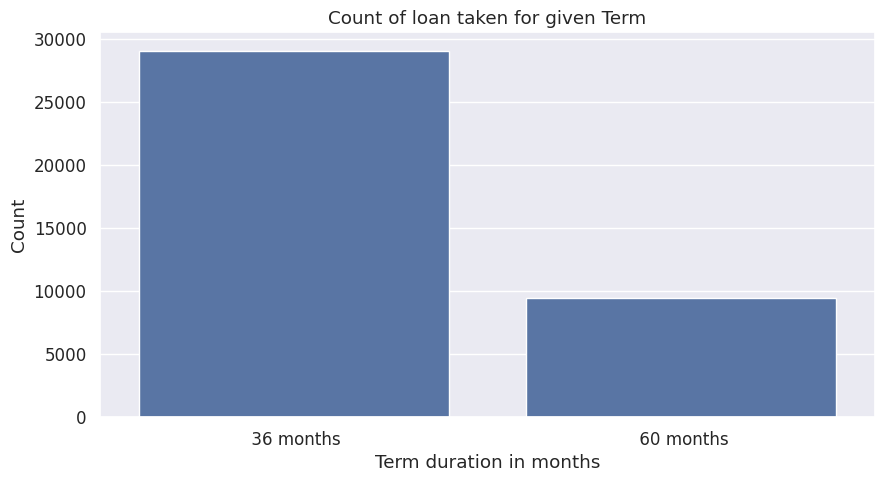

In [ ]:
# Term of loan
print(filtered.term.value_counts()*100/filtered.term.count())
# 0=Fully Paid, 1=Charged Off
plt.figure(figsize=(10,5))
ax=sns.countplot(x=filtered.term)
ax.set_title('Count of loan taken for given Term')
ax.set_xlabel('Term duration in months')
ax.set_ylabel('Count')
plt.show()

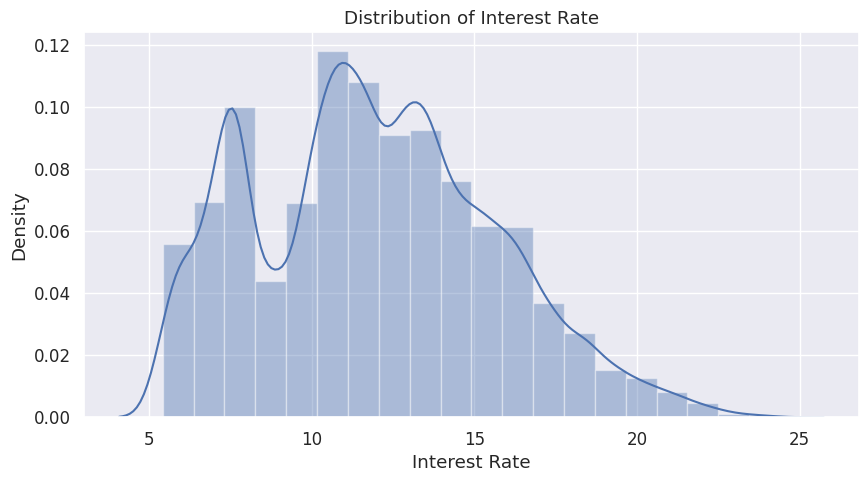

In [ ]:
# Distribution of interest rate
plt.figure(figsize=(10,5))
sns.distplot(sorted(filtered.int_rate),kde=True,bins=20)
plt.xlabel('Interest Rate')
plt.ylabel('Density')
plt.title('Distribution of Interest Rate')
plt.show()

Analyzing home_ownership

In [ ]:
#checking unique values for home_ownership
filtered['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [ ]:
# There are only 3 records with 'NONE' value in the data. So replacing the value with 'OTHER'
#replacing 'NONE' with 'OTHERS'
filtered['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)

In [ ]:
#checking unique values for home_ownership again
filtered['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [ ]:
#Bucketing Annual Income
def bucket_annual_inc(column):
    if column <= 40000:
        return '0 - 40k' # 25% quartile
    elif (column >40000) and (column <= 50000):
        return '40k - 50k'
    elif (column >50000) and (column <= 60000):
        return '50k to 60k'
    elif (column >60000) and (column <= 70000):
        return '60k to 70k'
    elif (column >70000) and (column <= 80000):
        return '70k to 80k'
    else:
        return '80k - above' # 75% quartile

filtered['annual_inc_b'] = filtered.apply(lambda x: bucket_annual_inc(x['annual_inc']), axis = 1)

In [ ]:
# Bucketing interest rate
def bucket_int_rate(column):
    if column <= 9:
        return 'Very Low' # 25% quartile
    elif (column >9) and (column <= 11):
        return 'Low'
    elif (column >11) and (column <= 13):
        return 'Moderate'
    elif (column >13) and (column <= 15):
        return 'High'
    else:
        return 'Very High' # 75% quartile

filtered['int_rate_b'] = filtered.apply(lambda x : bucket_int_rate(x.int_rate), axis = 1)

In [ ]:
# Bucketing dti
def bucket_dti(column):
    if column <= 8:
        return 'Very Low' # 25% quartile
    elif (column >8) and (column <= 12):
        return 'Low'
    elif (column >12) and (column <= 16):
        return 'Moderate'
    elif (column >16) and (column <= 20):
        return 'High'
    else:
        return 'Very High' # 75% quartile

filtered['dti_b'] = filtered.apply(lambda x : bucket_dti(x.dti), axis = 1)

**Unordered Categorical Variable Analysis**

<Axes: >

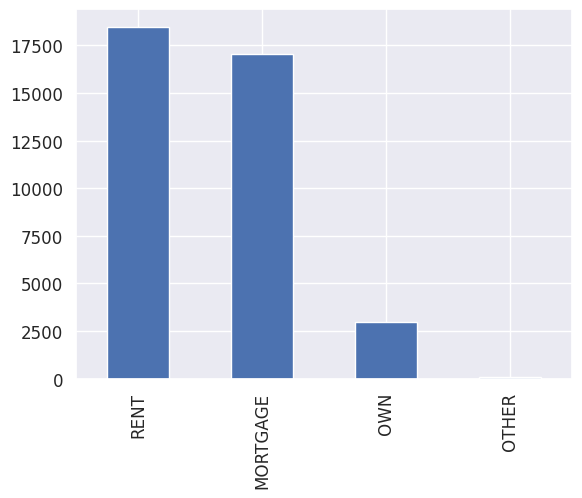

In [ ]:
# Majority of loan applicants are either living on Rent or on Mortgage
filtered['home_ownership'].value_counts().plot.bar()

<Axes: >

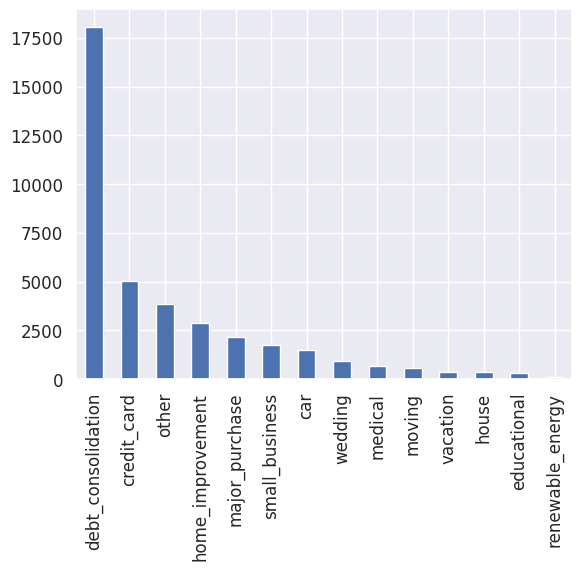

In [ ]:
# Most of the loan applicants are for debt_consolidations.
filtered['purpose'].value_counts().plot.bar()

<Axes: ylabel='addr_state'>

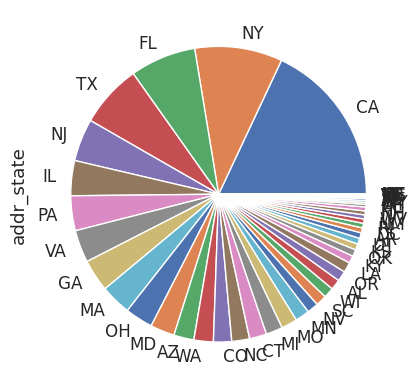

In [ ]:
# Most of the Loan applicants are from CA(State).
filtered['addr_state'].value_counts().plot(kind="pie")

**Ordered Categorical Variable Analysis**

<Axes: ylabel='emp_length'>

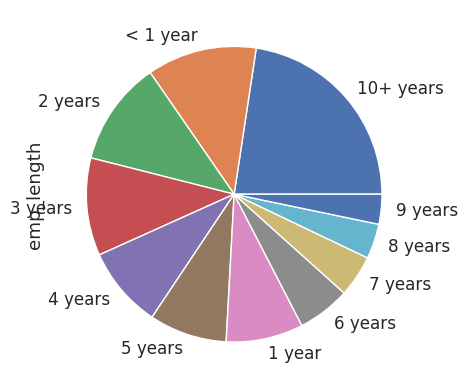

In [ ]:
#Most of the applications are having 10+ yrs of Exp.
filtered['emp_length'].value_counts().plot(kind="pie")

**Bivariate Analysis**

In [ ]:
inc_range_vs_loan=filtered.groupby(['annual_inc_b', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
inc_range_vs_loan['Total'] = inc_range_vs_loan['Charged Off']+ inc_range_vs_loan['Fully Paid']
inc_range_vs_loan['Chargedoff_Proportion'] = inc_range_vs_loan['Charged Off'] / inc_range_vs_loan['Total']
inc_range_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,annual_inc_b,Charged Off,Fully Paid,Total,Chargedoff_Proportion
0,0 - 40k,1751,7947,9698,0.180553
2,50k to 60k,867,4705,5572,0.155599
1,40k - 50k,862,4829,5691,0.151467
3,60k to 70k,559,3537,4096,0.136475
4,70k to 80k,465,3060,3525,0.131915
5,80k - above,1123,8872,9995,0.112356


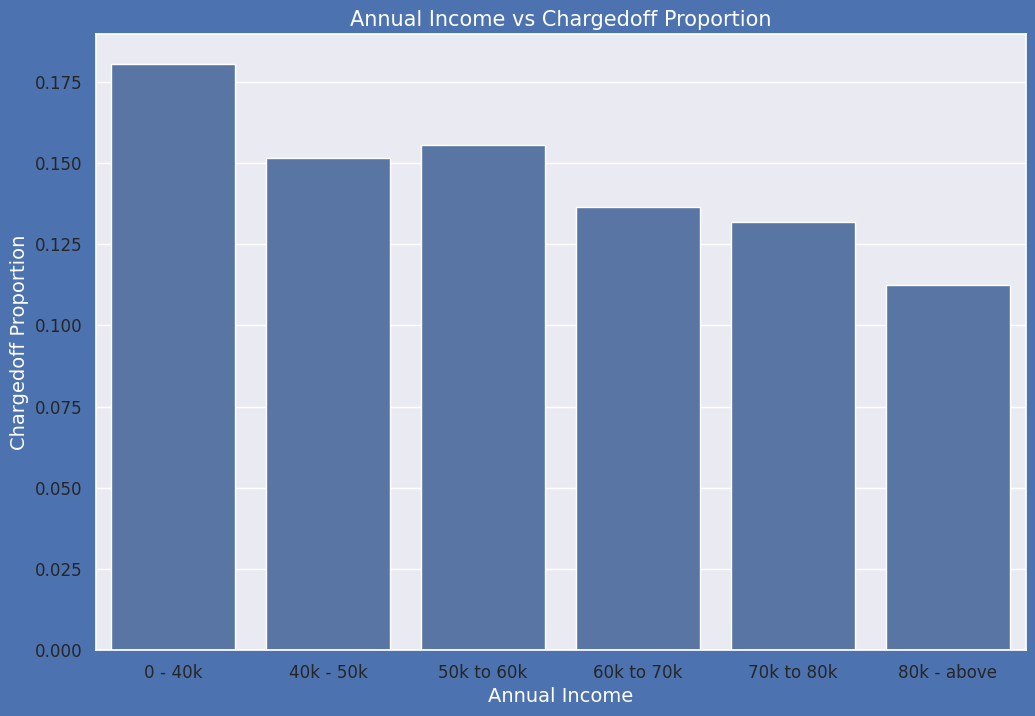

In [ ]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Annual Income vs Chargedoff Proportion',fontsize=15,color = 'w')
ax1=sns.barplot(x='annual_inc_b', y='Chargedoff_Proportion', data=inc_range_vs_loan)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
ax1.set_xlabel('Annual Income',fontsize=14,color='w')
plt.show()
# Observations:
# Income range 80000+  has less chances of charged off.
# Income range 0-20000 has high chances of charged off.
# Notice that with increase in annual income charged off proportion got decreased.

In [ ]:
#Bivariate Analysis on Intrest rate  against Chargedoff_Proportion -

interest_vs_loan = filtered.groupby(['int_rate_b', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
interest_vs_loan['Total'] = interest_vs_loan['Charged Off']+ interest_vs_loan['Fully Paid']
interest_vs_loan['Chargedoff_Proportion'] = interest_vs_loan['Charged Off'] / interest_vs_loan['Total']
interest_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,int_rate_b,Charged Off,Fully Paid,Total,Chargedoff_Proportion
3,Very High,2090,5906,7996,0.261381
0,High,1116,5467,6583,0.169528
2,Moderate,1137,6537,7674,0.148163
1,Low,699,5817,6516,0.107274
4,Very Low,585,9223,9808,0.059645


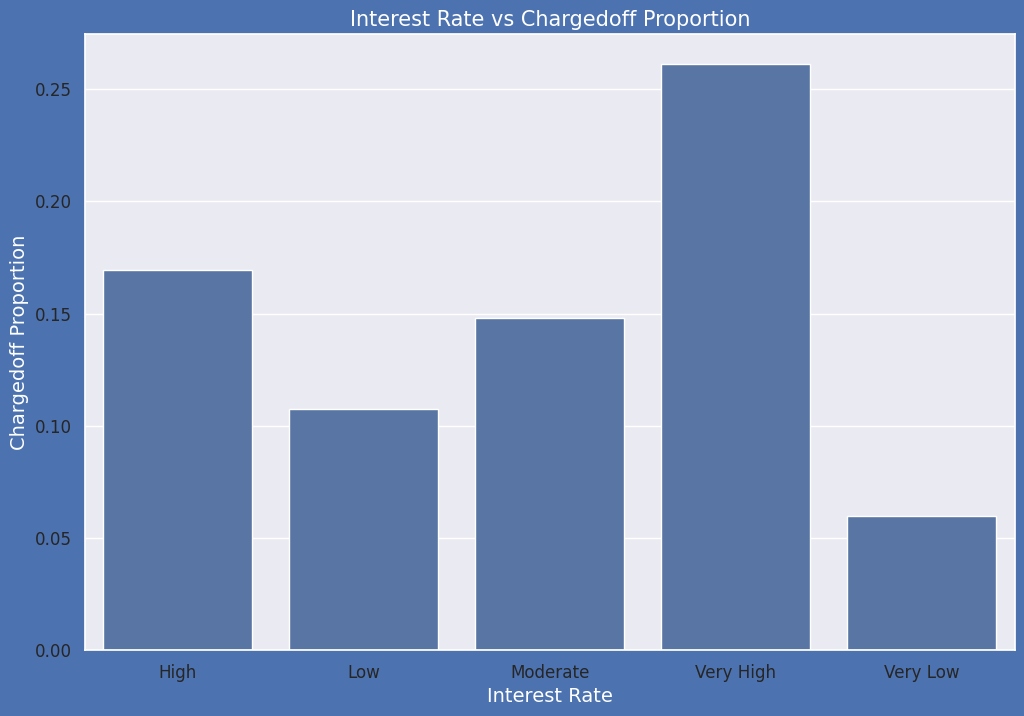

In [ ]:
## plot the diagram.
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Interest Rate vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='int_rate_b', y='Chargedoff_Proportion', data=interest_vs_loan)
ax1.set_xlabel('Interest Rate',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

# Observations:
# interest rate less than 10% or very low has very less chances of charged off. Intrest rates are starting from minimin 5 %.
# interest rate more than 16% or very high has good chnaces of charged off as compared to other category intrest rates.
# Charged off proportion is increasing with higher intrest rates.

Another inference form the houseowner variable those who are not owning the house are most likely to be charged off.

In [ ]:
#Bivariate Analysis of Home Ownership against Chargedoff_Proportion -

home_ownership_vs_loan = filtered.groupby(['home_ownership', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
home_ownership_vs_loan['Total'] = home_ownership_vs_loan['Charged Off']+ home_ownership_vs_loan['Fully Paid']
home_ownership_vs_loan['Chargedoff_Proportion'] = home_ownership_vs_loan['Charged Off'] / home_ownership_vs_loan['Total']
home_ownership_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,home_ownership,Charged Off,Fully Paid,Total,Chargedoff_Proportion
1,OTHER,18,83,101,0.178218
3,RENT,2839,15641,18480,0.153626
2,OWN,443,2532,2975,0.148908
0,MORTGAGE,2327,14694,17021,0.136713


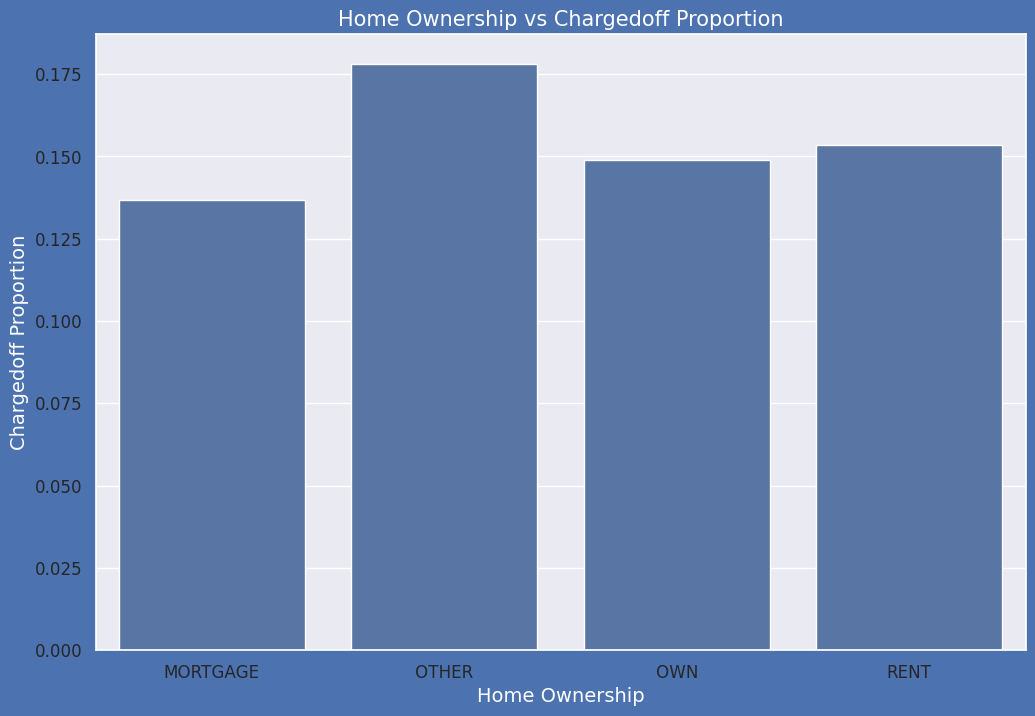

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Home Ownership vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='home_ownership', y='Chargedoff_Proportion', data=home_ownership_vs_loan)
ax1.set_xlabel('Home Ownership',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

# observation:
# Those who are not owning the home is having high chances of loan defaults.

In [ ]:
#Bivariate Analysis on Purpose of loan against Chargedoff_Proportion -

purpose_vs_loan = filtered.groupby(['purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
purpose_vs_loan['Total'] = purpose_vs_loan['Charged Off']+ purpose_vs_loan['Fully Paid']
purpose_vs_loan['Chargedoff_Proportion'] = purpose_vs_loan['Charged Off'] / purpose_vs_loan['Total']
purpose_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,purpose,Charged Off,Fully Paid,Total,Chargedoff_Proportion
11,small_business,475,1279,1754,0.270810
10,renewable_energy,19,83,102,0.186275
3,educational,56,269,325,0.172308
9,other,633,3232,3865,0.163777
5,house,59,308,367,0.160763
8,moving,92,484,576,0.159722
7,medical,106,575,681,0.155653
2,debt_consolidation,2767,15288,18055,0.153254
12,vacation,53,322,375,0.141333
4,home_improvement,347,2528,2875,0.120696


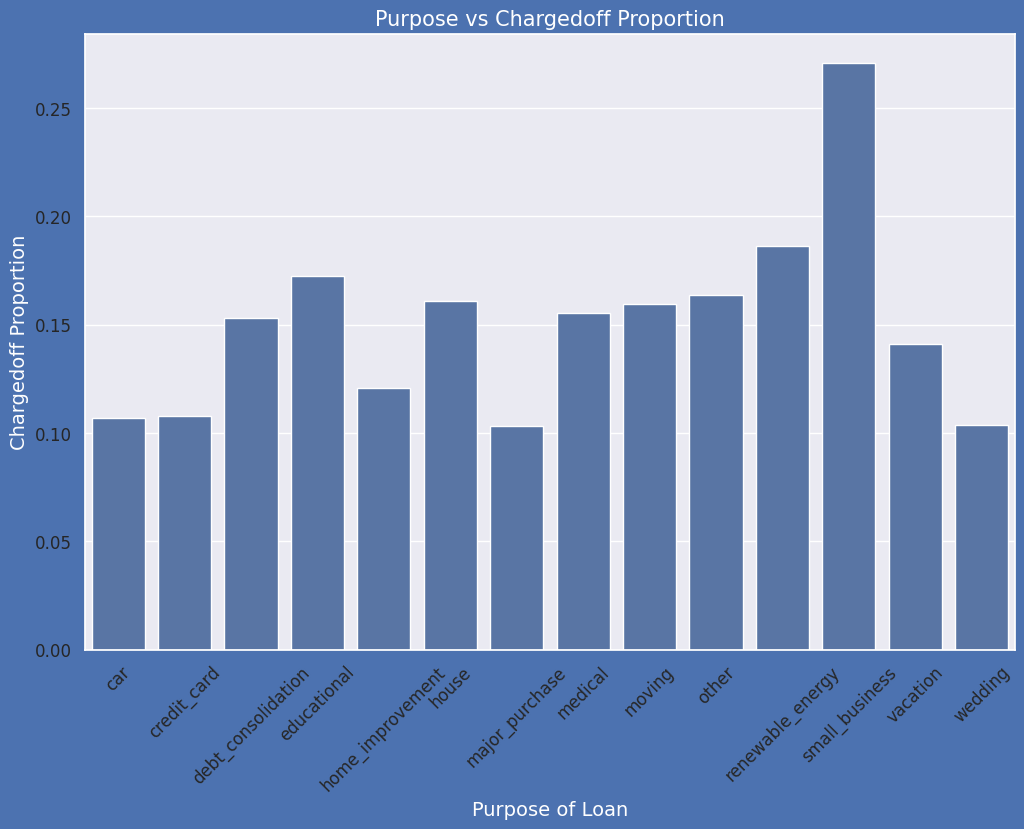

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Purpose vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='purpose', y='Chargedoff_Proportion', data=purpose_vs_loan)
ax1.set_xlabel('Purpose of Loan',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.xticks(rotation=45)
plt.show()

#1. Those applicants who is having home loan is having low chances of loan defaults.
#2. Those applicants having loan for small bussiness is having high chances for loan defaults.

In [ ]:
#Bivariate Analysis on DTI against Chargedoff_Proportion -

dti_vs_loan = filtered.groupby(['dti_b', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
dti_vs_loan['Total'] = dti_vs_loan['Charged Off']+ dti_vs_loan['Fully Paid']
dti_vs_loan['Chargedoff_Proportion'] = dti_vs_loan['Charged Off'] / dti_vs_loan['Total']
dti_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,dti_b,Charged Off,Fully Paid,Total,Chargedoff_Proportion
3,Very High,1205,5996,7201,0.167338
0,High,1127,5801,6928,0.162673
2,Moderate,1161,6627,7788,0.149076
1,Low,978,6248,7226,0.135345
4,Very Low,1156,8278,9434,0.122536


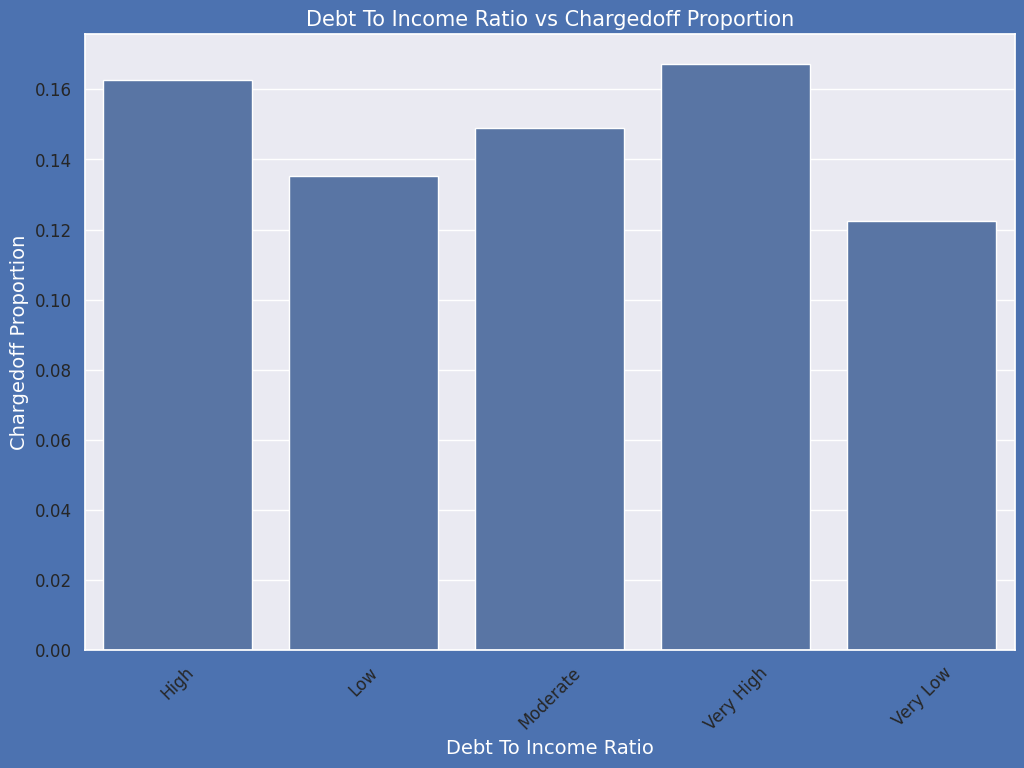

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Debt To Income Ratio vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='dti_b', y='Chargedoff_Proportion', data=dti_vs_loan)
ax1.set_xlabel('Debt To Income Ratio',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.xticks(rotation=45)
plt.show()

# Observation:
#1.High DTI value  having high risk of defaults
# 2 Lower the DIT having low chances loan defaults.

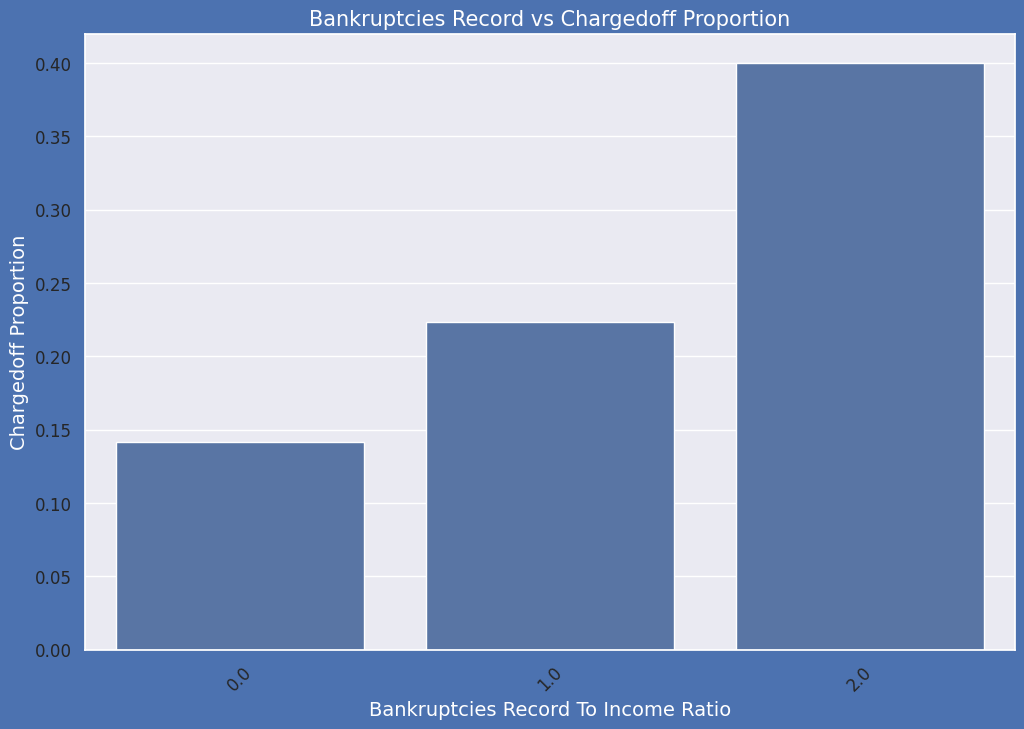

In [ ]:
# #Bivariate Analysis on Bankruptcies Record against Chargedoff_Proportion -
pub_rec_bankruptcies_vs_loan = filtered.groupby(['pub_rec_bankruptcies', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
pub_rec_bankruptcies_vs_loan['Total'] = pub_rec_bankruptcies_vs_loan['Charged Off']+ pub_rec_bankruptcies_vs_loan['Fully Paid']
pub_rec_bankruptcies_vs_loan['Chargedoff_Proportion'] = pub_rec_bankruptcies_vs_loan['Charged Off'] / pub_rec_bankruptcies_vs_loan['Total']
pub_rec_bankruptcies_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)


# graph
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Bankruptcies Record vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='pub_rec_bankruptcies', y='Chargedoff_Proportion', data=pub_rec_bankruptcies_vs_loan)
ax1.set_xlabel('Bankruptcies Record To Income Ratio',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.xticks(rotation=45)
plt.show()

# Observations:
#1.Bankruptcies Record with 2 is having high impact on loan defaults
# 2.Bankruptcies Record with 0 is low impact on loan defaults
# 3.Lower the Bankruptcies lower the risk.

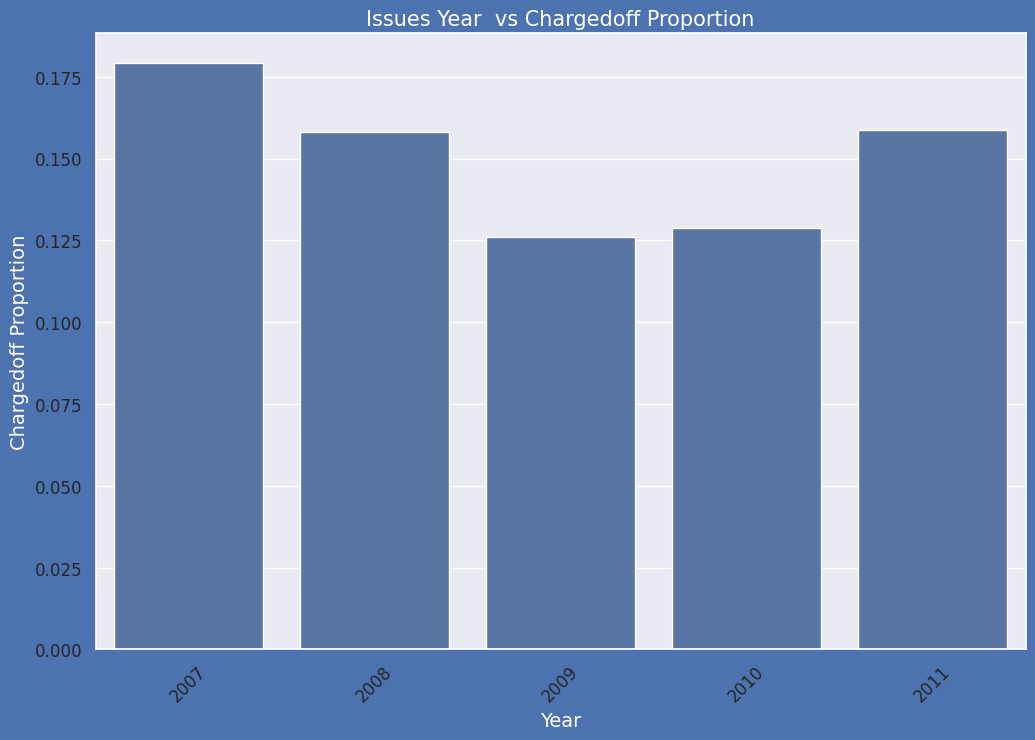

In [ ]:
# #Bivariate Analysis on Issues of Year  against Chargedoff_Proportion -

issue_year_vs_loan = filtered.groupby(['issue_year', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
issue_year_vs_loan['Total'] = issue_year_vs_loan['Charged Off']+ issue_year_vs_loan['Fully Paid']
issue_year_vs_loan['Chargedoff_Proportion'] = issue_year_vs_loan['Charged Off'] / issue_year_vs_loan['Total']
issue_year_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)


# graph
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Issues Year  vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='issue_year', y='Chargedoff_Proportion', data=issue_year_vs_loan)
ax1.set_xlabel('Year',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.xticks(rotation=45)
plt.show()

    # Year 2007 is highest loan defaults.
    # 2009 is having lowest loan defaults.

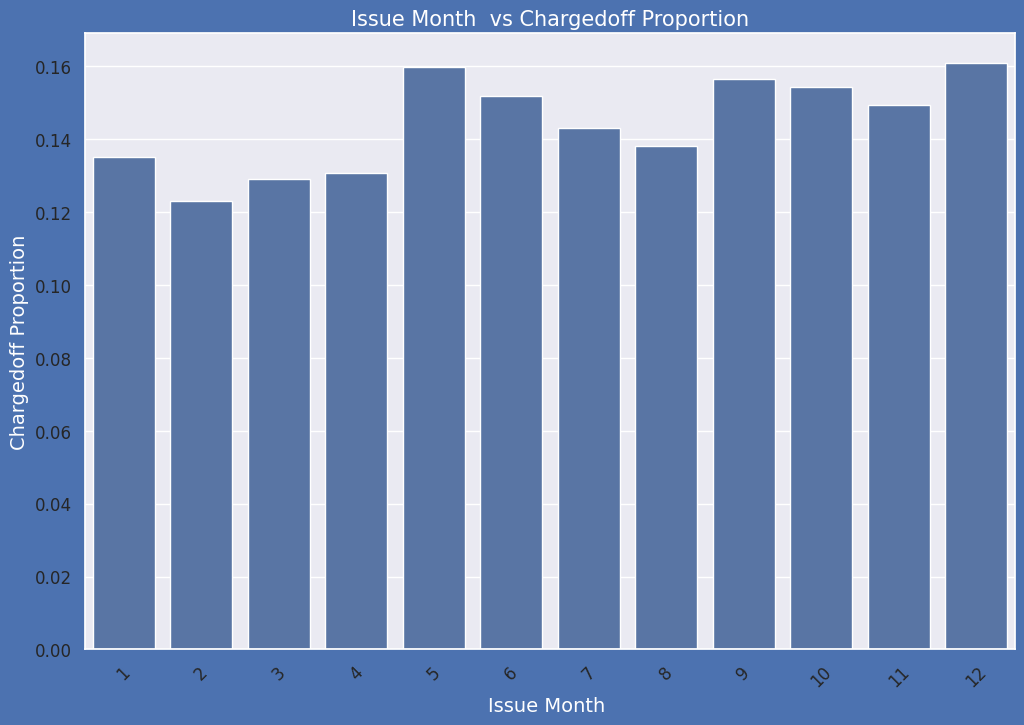

In [ ]:
# #Bivariate Analysis on Month of Issue of loan Record against Chargedoff_Proportion -

issue_month_vs_loan = filtered.groupby(['issue_month', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
issue_month_vs_loan['Total'] = issue_month_vs_loan['Charged Off']+ issue_month_vs_loan['Fully Paid']
issue_month_vs_loan['Chargedoff_Proportion'] = issue_month_vs_loan['Charged Off'] / issue_month_vs_loan['Total']
issue_month_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)


# graph
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Issue Month  vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='issue_month', y='Chargedoff_Proportion', data=issue_month_vs_loan)
ax1.set_xlabel('Issue Month ',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# 1. Those loan has been issued in May, September and december is having high number of loan defaults
# 2. Those loan has been issued in month of February is having high number of loan defaults
#3. Majority of loan defaults comig from applicants whose loan has been aprroved from September-to Deceber

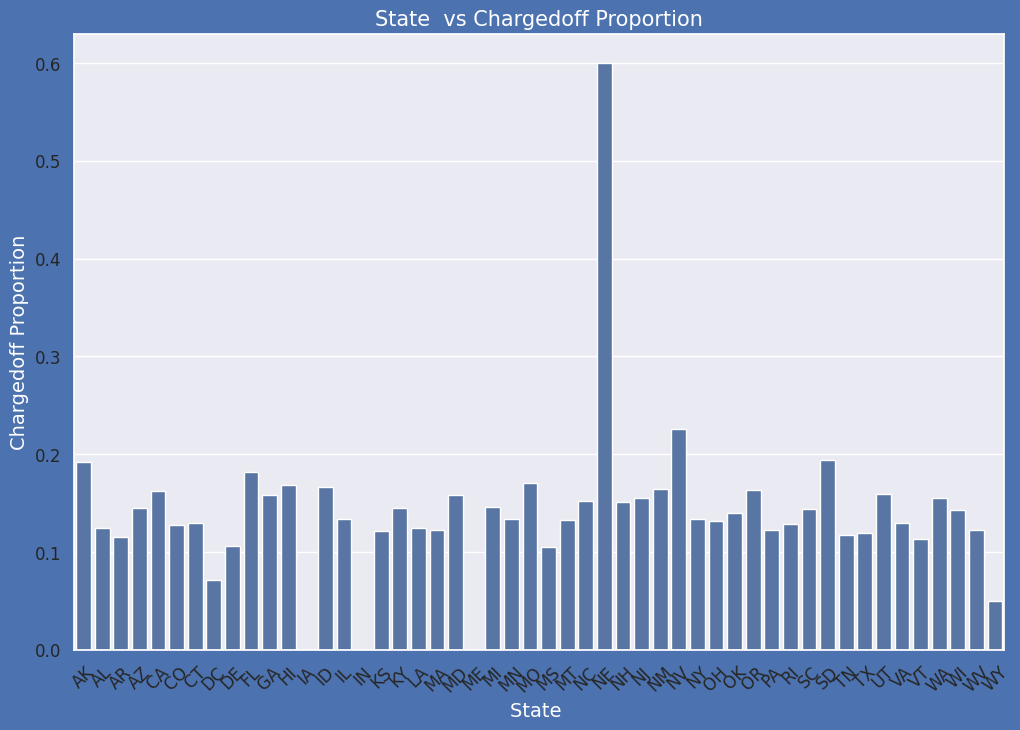

In [ ]:
# #Bivariate Analysis on Address state  against Chargedoff_Proportion -

addr_state_vs_loan = filtered.groupby(['addr_state', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
addr_state_vs_loan['Total'] = addr_state_vs_loan['Charged Off']+ addr_state_vs_loan['Fully Paid']
addr_state_vs_loan['Chargedoff_Proportion'] = addr_state_vs_loan['Charged Off'] / addr_state_vs_loan['Total']
addr_state_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# graph
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('State  vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='addr_state', y='Chargedoff_Proportion', data=addr_state_vs_loan)
ax1.set_xlabel('State ',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.xticks(rotation=45)
plt.show()

# Observations:
# 1.NE States is holding highest number of loan defaults.


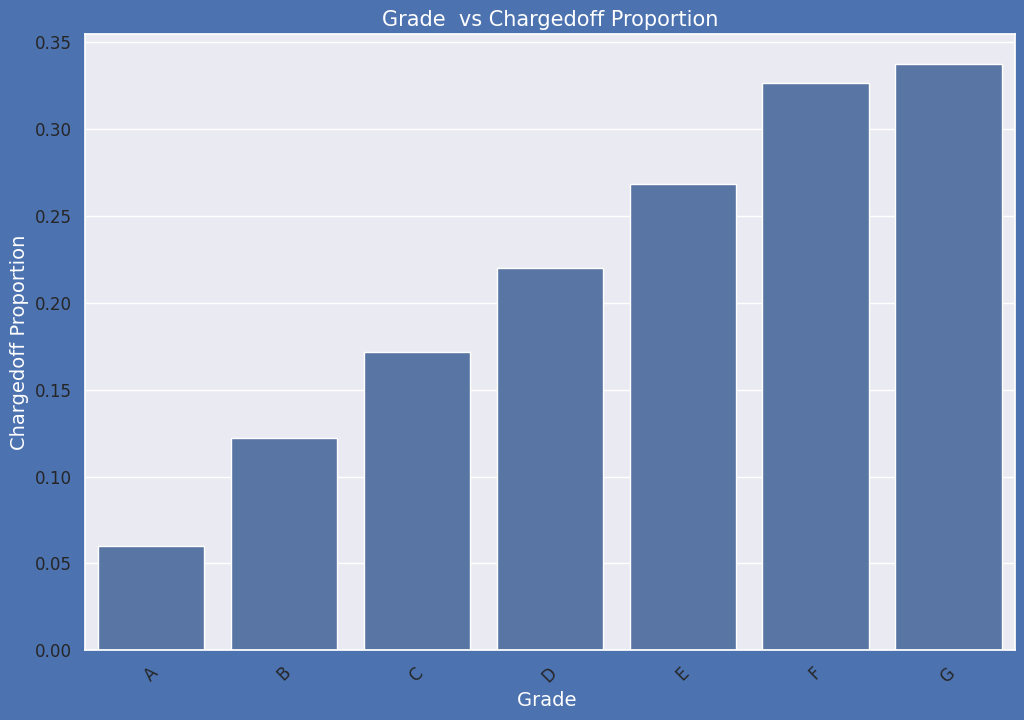

In [ ]:
# #Bivariate Analysis on Grade against Chargedoff_Proportion -

grade_vs_loan = filtered.groupby(['grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_vs_loan['Total'] = grade_vs_loan['Charged Off']+ grade_vs_loan['Fully Paid']
grade_vs_loan['Chargedoff_Proportion'] = grade_vs_loan['Charged Off'] / grade_vs_loan['Total']
grade_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)


# graph
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Grade  vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='grade', y='Chargedoff_Proportion', data=grade_vs_loan)
ax1.set_xlabel('Grade ',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.xticks(rotation=45)
plt.show()

    # observations :
    # 1. The Loan applicants with loan Grade G is having higest Loan    Defaults.
    #2. The Loan applicants with loan A is having lowest Loan Defaults.

**Correlation Analysis**

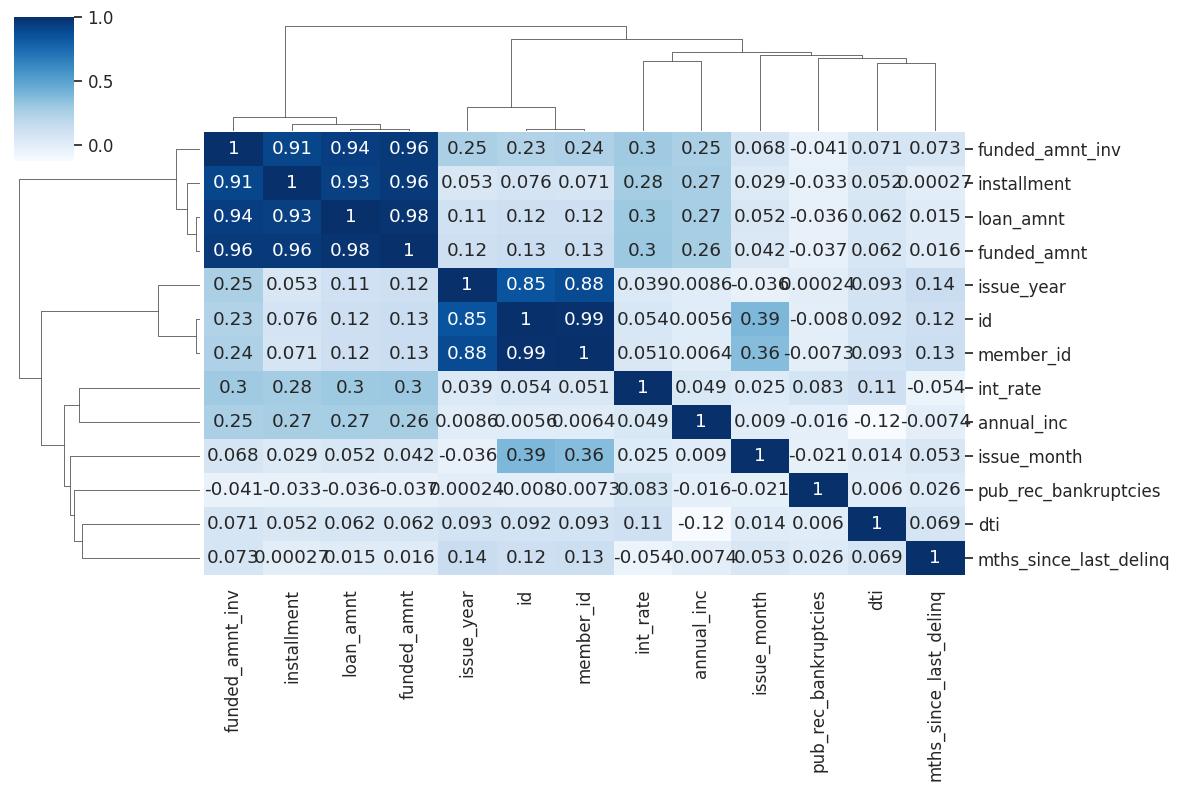

In [ ]:
corr_loan = filtered
corr = corr_loan.corr()
sns.set(font_scale=1.1)
sns.clustermap(corr, annot=True, figsize=(12, 8), cmap="Blues")
plt.show()

In [ ]:
drop_columns = ['installment', 'id', 'issue_year', 'issue_month']
corr_loan = corr_loan.drop(columns=drop_columns)

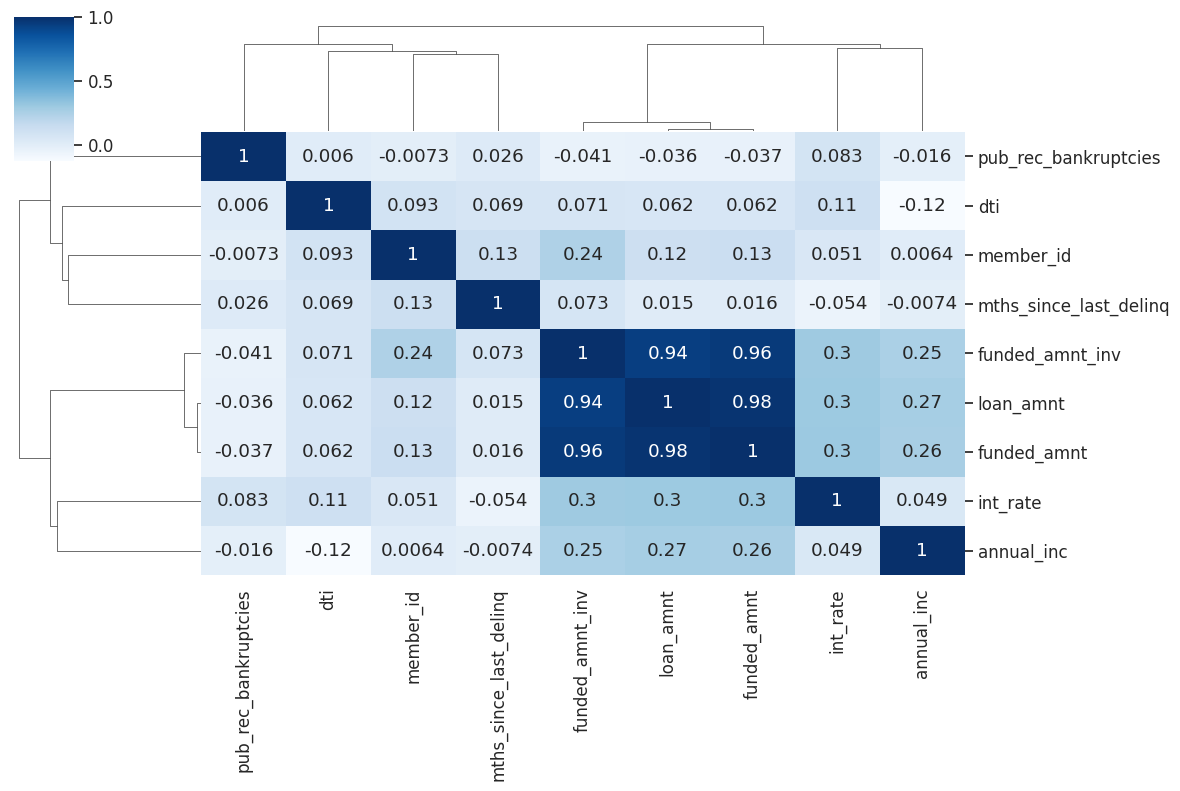

In [ ]:
corr = corr_loan.corr()
sns.set(font_scale=1.1)
sns.clustermap(corr, annot=True, figsize=(12, 8), cmap="Blues")
plt.show()

Negative Correlation:

1.loan_amnt has negative correlation with pub_rec_bankrupticies

2.annual income has a negative correlation with dti

Strong Correlation:

1.term has a strong correlation with loan amount

2.term has a strong correlation with interest rate

3.annual income has a strong correlation with loan_amount





<Axes: xlabel='term', ylabel='loan_amnt'>

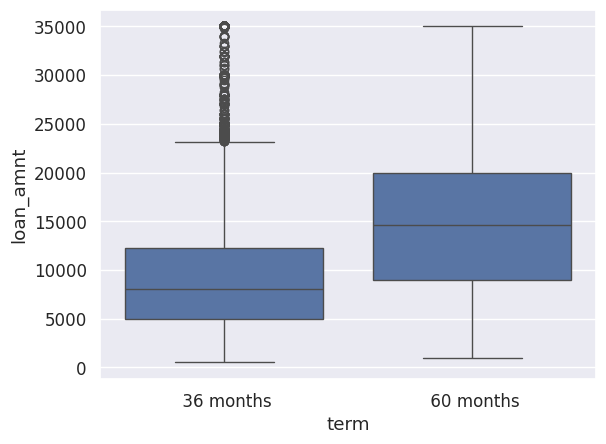

In [ ]:
sns.boxplot(x = 'term', y = 'loan_amnt', data=corr_loan)

**from the above graph we can see that if term is increasing loan amount is also increasing**

<Axes: xlabel='term', ylabel='int_rate'>

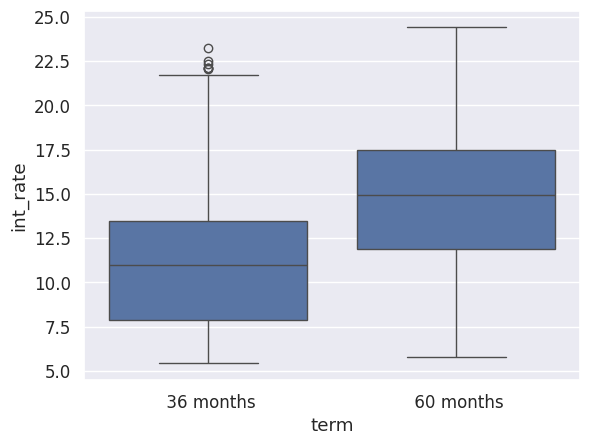

In [ ]:
sns.boxplot(x = 'term', y = 'int_rate', data=corr_loan)

In [ ]:
filtered.shape

(38577, 31)